## **TASK 1 - Prediction Using Supervised ML**
* To predict the percentage of an student based on the no. of study hours they study.
* To predict score if a student studies for 9.25hrs/day

### Author  - Anjali Aravind

In [1]:
import numpy as np
import pandas as pd 

**To import the dataset**

In [2]:
data_set=pd.read_csv('http://bit.ly/w-data') 
data_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data_set.shape  #it shows 25 rows and 2 columns

(25, 2)

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data_set.isnull().sum() # no null values founded in the dataset 

Hours     0
Scores    0
dtype: int64

### Data Visualisation

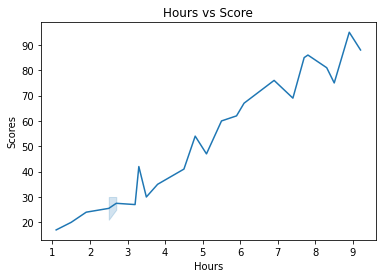

In [8]:
import matplotlib.pyplot as plt  
import seaborn as sns
sns.lineplot(x="Hours", y="Scores", data=data_set)
plt.title('Hours vs Score')  
plt.show()

This shows that the Scores and Hours are linearly correlated so hours increases scores also increase

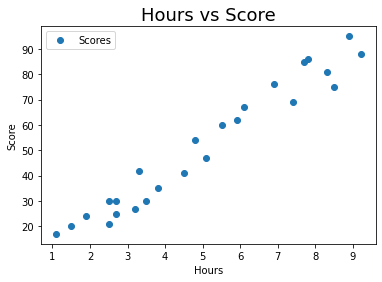

In [12]:
data_set.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score',size=18)  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

This scatter plot seems to suggest a correlation between the 'Marks and 'Hours'. It indicates a positive linear relationship between hours studied and percentage of mark. Plotting a regression line will confirm the correlation.

**Regression plot**

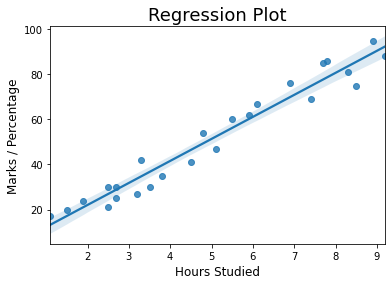

In [9]:
sns.regplot(x= data_set['Hours'], y= data_set['Scores'])
plt.title('Regression Plot',size=18)
plt.ylabel('Marks / Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Preparing data and splitting it into train and test sets.


In [11]:
X = data_set.iloc[:, :-1].values 
y = data_set.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

 Training the Algorithm

Training the model using linear regression.

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing Predicted Marks with Actual Marks.

In [15]:
dfs_mark = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dfs_mark

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Actual vs Predicted Plot

In [16]:
own_pred = regressor.predict([[9.25]])
print(own_pred[0])

93.69173248737538


No of Hours=92.5

Predicted Score = 93.69173248737539

# Evaluting the Model

In [23]:
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error:  21.5987693072174
Mean Absolute Error: 4.183859899002975


A small value for Mean Absolute Error means that the chances of error through this predictive model is very less.

Predicted marks for a student if they study for 9.25 hrs/day?

Depending on the Regression Model, for a student studying 9.25 hours per day, the predicted marks will be 93.69173248737539